In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

#from sklearn.

In [9]:
from nltk.corpus import stopwords
import string

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
df= pd.read_csv('data/df_and_token.csv')

(22641, 13)

In [9]:
df.head(1)

,Unnamed: 0,index,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,token_strings
0,0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,absolutely wonderful silky sexy comfortable ab...


## Base Models with count vectorizer and regular stop-words:

In [42]:
X= df['Review Text']
y= df['Recommended IND']

X.shape, y.shape

((22641,), (22641,))

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    stratify=y, 
                                                    test_size=0.2)

In [55]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((18112,), (18112,), (4529,), (4529,))

In [44]:
vectorizer = CountVectorizer(stop_words= 'english')
train_vec = vectorizer.fit_transform(X_train)


In [45]:
train_vec.shape

(18112, 12560)

In [47]:
train_vec.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [56]:
test_vec= vectorizer.fit_transform(X_test)
test_vec.shape

(4529, 6890)

In [54]:
### Logistic regression

lr = LogisticRegression()
lr.fit(train_vec,y_train.values.reshape(-1,1))

test_vec= vectorizer.fit_transform(X_test).todense()

preds= lr.predict(test_vec)
cm = confusion_matrix(preds, y_test)
print(cm)

/Users/bahar/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/bahar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: X has 6890 features per sample; expecting 12560

In [ ]:
### XGBOOSt

In [ ]:
### Random Forrest

In [ ]:
### naive bayes

## Better Models with TF-IDF and updated stop-words:

In [ ]:
### Logistic

In [ ]:
### XGBOOST

In [ ]:
### Random Forrest

In [ ]:
### Naive Bayes

## BEST MODELS with SMOTE

In [12]:
vectorizer= TfidfVectorizer(min_df=3, max_features= 5000, 
                            token_pattern= '\s([A-Za-z0-9-]+)\s', ngram_range=(1,2))

In [13]:
tfidf= vectorizer.fit_transform(df.token_strings)

In [14]:
matrix = tfidf.todense()
word_matrix = pd.DataFrame(data = matrix, columns= vectorizer.get_feature_names())
word_matrix.head(1)

,-,--small,00p,2nd,2p,30dd,32b,32c,32d,32dd,...,year-old,year-round,yellow,yesterday,yet,yet-not,yoga,young,zip,zipper
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
word_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22641 entries, 0 to 22640
Columns: 8228 entries, - to zipper-not
dtypes: float64(8228)
memory usage: 1.4 GB


In [49]:
def top_n_ngram(corpus,n = None,ngram = 1):
    bag_of_words = tfidf 
    sum_words = bag_of_words.sum(axis =0) #Calculates the tfidf of all the word in the whole review
    words_freq = [(word,sum_words[0,idx]) for word,idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq,key = lambda x:x[1],reverse = True)
    return words_freq[:n]


<AxesSubplot:title={'center':'Top 20 unigrams in review after removing stop words'}, xlabel='token_strings'>

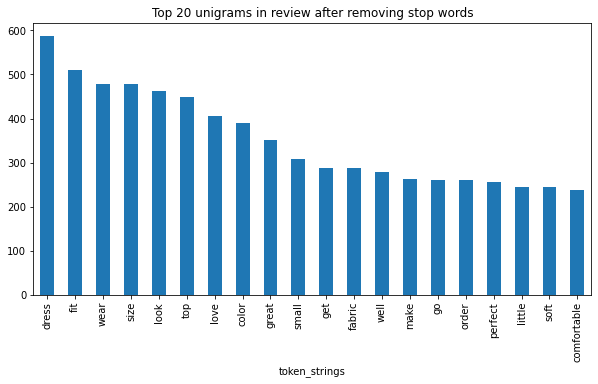

In [51]:
common_words = top_n_ngram(df['token_strings'], 20, 1)
common_df = pd.DataFrame(common_words, columns = ['token_strings' , 'count'])

plt.figure(figsize =(10,5))
common_df.groupby('token_strings').sum()['count'].sort_values(ascending=False).plot(
kind='bar', title='Top 20 unigrams in review after removing stop words')


In [45]:
def top_n_ngram(corpus,n = None,ngram = 1):
    vec = CountVectorizer(stop_words = 'english',ngram_range=(ngram,ngram)).fit(corpus)
    bag_of_words = vec.transform(corpus) #Have the count of  all the words for each review
    sum_words = bag_of_words.sum(axis =0) #Calculates the count of all the word in the whole review
    words_freq = [(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq,key = lambda x:x[1],reverse = True)
    return words_freq[:n]


<AxesSubplot:title={'center':'Top 20 unigrams in review after removing stop words'}, xlabel='token_strings'>

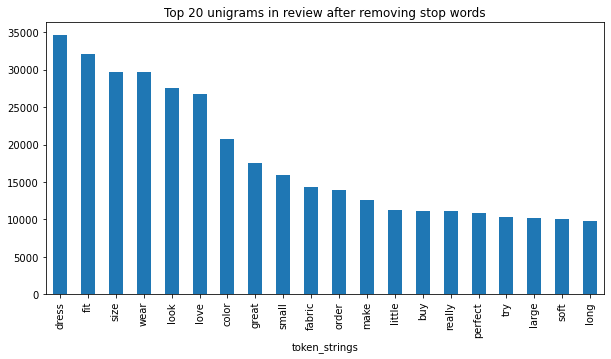

In [46]:
common_words = top_n_ngram(df['token_strings'], 20, 1)
common_df = pd.DataFrame(common_words, columns = ['token_strings' , 'count'])

plt.figure(figsize =(10,5))
common_df.groupby('token_strings').sum()['count'].sort_values(ascending=False).plot(
kind='bar', title='Top 20 unigrams in review after removing stop words')

## Machine Learning

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import LinearSVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [64]:
word_matrix.head()

,-,--small,00p,2nd,2p,30dd,32b,32c,32d,32dd,...,year-old,year-round,yellow,yesterday,yet,yet-not,yoga,young,zip,zipper
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.190598,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [65]:
X= word_matrix
y= df['Recommended IND']

X.shape, y.shape

((22641, 5000), (22641,))

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    stratify=y, 
                                                    test_size=0.2)

In [67]:
X_train.shape

(18112, 5000)

In [73]:
def model(mod, model_name, X_train, y_train, X_test, y_test):
    mod.fit(X_train, y_train)
    print(model_name)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 5)
    predictions = cross_val_predict(mod, X_test, y_test, cv = 5)
    print("Accuracy:", round(acc.mean(),3))
    cm = confusion_matrix(y_test, predictions)
    print("Confusion Matrix:  \n", cm)
    print("Classification Report \n", classification_report( y_test, predictions))

In [74]:
#1. Gaussian Naive Bayes
gnb = GaussianNB()
model(gnb, "Gaussian Naive Bayes", X_train, y_train, X_test, y_test)

Gaussian Naive Bayes
Accuracy: 0.564
Confusion Matrix:  
 [[ 228  592]
 [ 422 3287]]
Classification Report 
               precision    recall  f1-score   support

           0       0.35      0.28      0.31       820
           1       0.85      0.89      0.87      3709

    accuracy                           0.78      4529
   macro avg       0.60      0.58      0.59      4529
weighted avg       0.76      0.78      0.77      4529



In [76]:
# 2. Random Forest Classifier
ran = RandomForestClassifier(n_estimators=20)
model(ran, "Random Forest Classifier", X_train, y_train, X_test, y_test)

Random Forest Classifier
Accuracy: 0.841
Confusion Matrix:  
 [[ 152  668]
 [  88 3621]]
Classification Report 
               precision    recall  f1-score   support

           0       0.63      0.19      0.29       820
           1       0.84      0.98      0.91      3709

    accuracy                           0.83      4529
   macro avg       0.74      0.58      0.60      4529
weighted avg       0.81      0.83      0.79      4529



In [75]:
# 3. Logistic Regression
log = LogisticRegression()
model(log, "Logistic Regression", X_train, y_train, X_test, y_test)

Logistic Regression
Accuracy: 0.856
Confusion Matrix:  
 [[  78  742]
 [  20 3689]]
Classification Report 
               precision    recall  f1-score   support

           0       0.80      0.10      0.17       820
           1       0.83      0.99      0.91      3709

    accuracy                           0.83      4529
   macro avg       0.81      0.54      0.54      4529
weighted avg       0.83      0.83      0.77      4529



In [3]:
from xgboost import XGBClassifier

In [19]:
xgb = XGBClassifier(use_label_encoder=False)
model(xgb, 'XGBClassifier', X_train, y_train, X_test, y_test)

[19:35:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
[19:43:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:46:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:49:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with

In [21]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [23]:
X_sm, y_sm = smote.fit_resample(X,y)

X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.3, random_state=100)

In [24]:
def model_sm(mod, model_name, x_train_sm, y_train_sm, x_test_sm, y_test_sm):
    mod.fit(x_train_sm, y_train_sm)
    print(model_name)
    acc = cross_val_score(mod, X_train_sm, y_train_sm, scoring = "accuracy", cv = 5)
    predictions = cross_val_predict(mod, X_train_sm, y_train_sm, cv = 5)
    print("Accuracy:", round(acc.mean(),3))
    cm = confusion_matrix(predictions, y_train_sm)
    print("Confusion Matrix:  \n", cm)
    print("                    Classification Report \n",classification_report(predictions, y_train_sm))

In [25]:
ran = RandomForestClassifier(n_estimators=50)
model_sm(ran, "Random Forest Classifier", X_train_sm, y_train_sm, X_test_sm, y_test_sm)

Random Forest Classifier
Accuracy: 0.916
Confusion Matrix:  
 [[12022  1155]
 [  976 11803]]
                    Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.91      0.92     13177
           1       0.91      0.92      0.92     12779

    accuracy                           0.92     25956
   macro avg       0.92      0.92      0.92     25956
weighted avg       0.92      0.92      0.92     25956



In [26]:
xgb = XGBClassifier(use_label_encoder=False)
model_sm(xgb, 'XGBClassifier', X_train_sm, y_train_sm, X_test_sm, y_test_sm)

[09:50:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
[09:56:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:00:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:04:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with

In [27]:
log = LogisticRegression()
model_sm(log, "Logistic Regression", X_train_sm, y_train_sm, X_test_sm, y_test_sm)

Logistic Regression
Accuracy: 0.874
Confusion Matrix:  
 [[11643  1921]
 [ 1355 11037]]
                    Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.86      0.88     13564
           1       0.85      0.89      0.87     12392

    accuracy                           0.87     25956
   macro avg       0.87      0.87      0.87     25956
weighted avg       0.87      0.87      0.87     25956



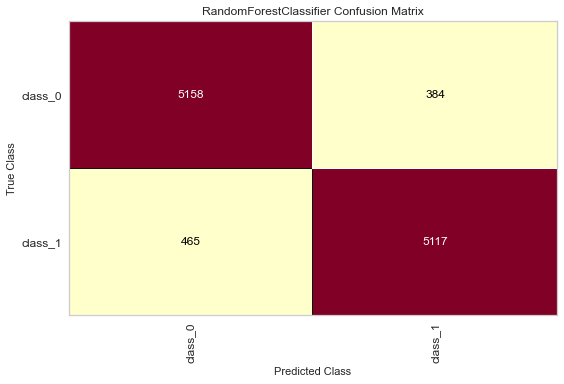

In [28]:
from yellowbrick.classifier import ConfusionMatrix
model = ran
matrix = ConfusionMatrix(model, classes=['class_0', 'class_1'])
# Fit, score, and display the visualizer
matrix.fit(X_train_sm, y_train_sm)
matrix.score(X_test_sm, y_test_sm)
matrix.show();

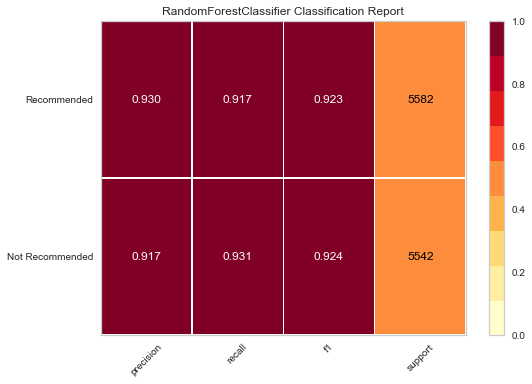

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [31]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(ran, classes=['Not Recommended', 'Recommended'], support=True)

visualizer.fit(X_train_sm, y_train_sm)  # Fit the visualizer and the model
visualizer.score(X_test_sm, y_test_sm)  # Evaluate the model on the test data
visualizer.show()             # Draw/show the data

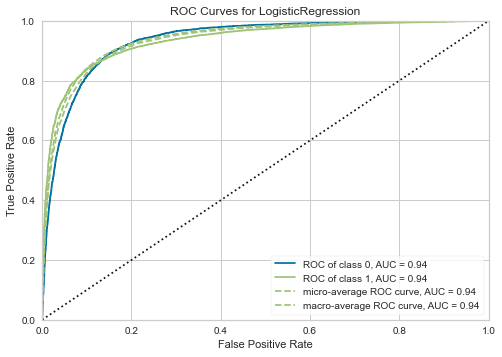

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [29]:
from yellowbrick.classifier import ROCAUC

model = log
visualizer = ROCAUC(model)
visualizer.fit(X,y)
visualizer.score(X,y)
visualizer.show()

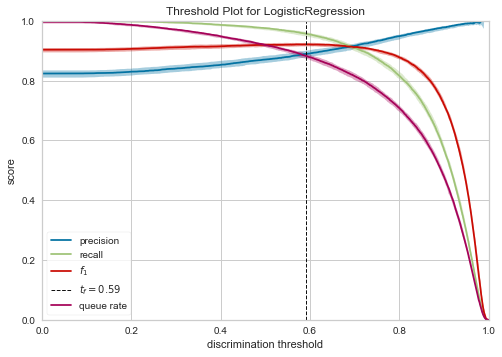

<AxesSubplot:title={'center':'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

In [30]:
from yellowbrick.classifier import DiscriminationThreshold

# Instantiate the classification model and visualizer
model = log
visualizer = DiscriminationThreshold(model)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

<WordListCorpusReader in '/Users/bahar/nltk_data/corpora/stopwords'>